<a href="https://colab.research.google.com/github/Oliveira-Wallace/Wallace-Oliveira/blob/main/ClassificacaoDeClienteParaEmprestimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importar pacotes
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving exemplo2.csv to exemplo2.csv


{'exemplo2.csv': b'idade,conta_corrente,risco\r\n21.257389113463468,783.1279113299654,ruim\r\n21.76657261348206,979.7475209054863,bom\r\n25.321033431048036,1065.328053967916,ruim\r\n23.91926758092186,1195.758078254006,bom\r\n21.80529791105156,1083.7644500799438,bom\r\n22.23257374098182,1024.8900876674877,ruim\r\n24.922362024093946,1387.7858142950672,bom\r\n21.744767888903304,1217.385348848293,bom\r\n27.452365981858836,1084.4783959227175,bom\r\n22.517270692517886,1325.8187282347626,bom\r\n23.872316526168746,1085.0986374807612,ruim\r\n21.926825546010257,640.5622292186174,ruim\r\n19.01684251570921,631.6082634197735,ruim\r\n22.50672215442364,704.332771842254,ruim\r\n22.780826903212553,957.203963741772,ruim\r\n26.716063671215682,1469.0436890493934,bom\r\n26.180783693519107,1513.4358870176864,bom\r\n23.781336010081816,1238.0946224019635,ruim\r\n21.84218370406367,1036.003233054494,ruim\r\n26.01304701508473,836.4680677072224,ruim\r\n21.10240415984999,917.3432756638896,bom\r\n20.587560309110547

In [3]:
# criar um DataFrame
df = pd.read_csv('exemplo2.csv')
df.head()

,idade,conta_corrente,risco
0,21.257389,783.127911,ruim
1,21.766573,979.747521,bom
2,25.321033,1065.328054,ruim
3,23.919268,1195.758078,bom
4,21.805298,1083.764450,bom


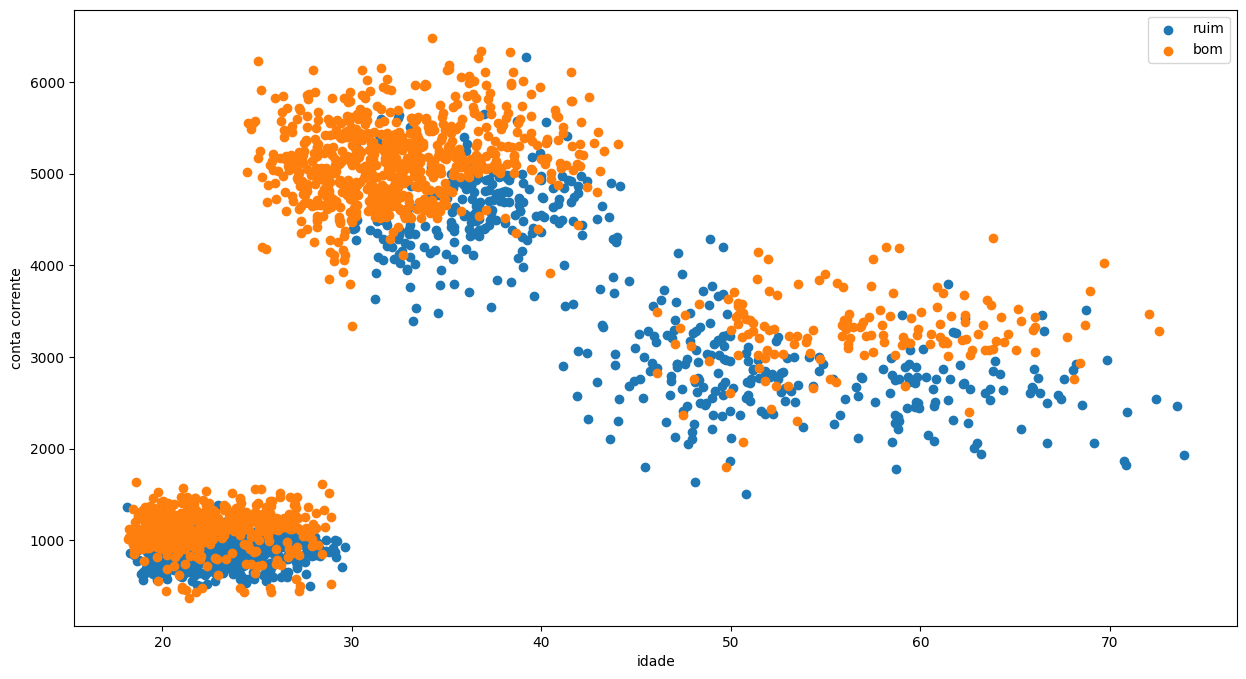

In [4]:
# visualização do problema
plt.figure(figsize=(15, 8)) # dimenções da plotagem
plt.scatter(df[df.risco == 'ruim'].idade, df[df.risco == 'ruim'].conta_corrente)
plt.scatter(df[df.risco == 'bom'].idade, df[df.risco == 'bom'].conta_corrente)
plt.xlabel('idade')
plt.ylabel('conta corrente')
plt.legend(['ruim', 'bom'])


#Separação de inputs e outputs


In [5]:
# dropar a coluna risco e o eixo 1(colunas)
X = df.drop('risco', axis=1)
y = df.risco

#Usando KNN no Python

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

#Previsão de classe

In [9]:
# idade do cliente e valor em conta
knn.predict([[40, 5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['bom'], dtype=object)

#Avaliando o classificador

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
# criar os inputs do conjunto de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3)

In [12]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)

accuracy_score(y_test, knn2.predict(X_test))

0.8045563549160671

#Preprocessamento de dos inputs

In [13]:
# normalização de dados
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X)
X_norm

array([[0.05586473, 0.06720224],
       [0.06499436, 0.09938945],
       [0.12872564, 0.11339923],
       ...,
       [0.85424954, 0.36522222],
       [0.62401886, 0.42781034],
       [0.61473291, 0.54031447]])

In [14]:
# novo conjunto de treinamento de teste com dados normalizados
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

accuracy_score(y_test, knn3.predict(X_test))

0.790167865707434

#Previsões com dados normalizados

In [17]:
novo_cliente = [[18, 1000]]
X_new = normalizador.transform(novo_cliente)
knn3.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['bom'], dtype=object)